<a href="https://colab.research.google.com/github/holiz12/Analyse-Telco-Custer-Churn-using-XGBoost/blob/main/Telco_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [205]:
url = 'https://raw.githubusercontent.com/holiz12/Analyse-Telco-Custer-Churn-using-XGBoost/main/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)

In [206]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [207]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [208]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [209]:
df['SeniorCitizen'].unique()

array([0, 1])

In [210]:
df.drop(['customerID'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [211]:
df['MultipleLines'].replace(' ','-',regex=True,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No-phone-service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No-phone-service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [212]:
df['InternetService'].replace(' ','-',regex=True,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No-phone-service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No-phone-service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber-optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [213]:
df['Contract'].replace(' ','-',regex=True,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No-phone-service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One-year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No-phone-service,DSL,Yes,No,Yes,Yes,No,No,One-year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber-optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [214]:
df['PaymentMethod'].replace(' ','-',regex=True,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No-phone-service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic-check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One-year,No,Mailed-check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed-check,53.85,108.15,1
3,Male,0,No,No,45,No,No-phone-service,DSL,Yes,No,Yes,Yes,No,No,One-year,No,Bank-transfer-(automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber-optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic-check,70.70,151.65,1


In [215]:
df['PaymentMethod'].unique()[0:10]

array(['Electronic-check', 'Mailed-check', 'Bank-transfer-(automatic)',
       'Credit-card-(automatic)'], dtype=object)

In [216]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [217]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [218]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [219]:
len(df.loc[df['TotalCharges']==' '])

11

In [220]:
df.loc[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No-phone-service,DSL,Yes,No,Yes,Yes,Yes,No,Two-year,Yes,Bank-transfer-(automatic),52.55,,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two-year,No,Mailed-check,20.25,,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two-year,No,Mailed-check,80.85,,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two-year,No,Mailed-check,25.75,,0
1340,Female,0,Yes,Yes,0,No,No-phone-service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two-year,No,Credit-card-(automatic),56.05,,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two-year,No,Mailed-check,19.85,,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two-year,No,Mailed-check,25.35,,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two-year,No,Mailed-check,20.00,,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One-year,Yes,Mailed-check,19.70,,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two-year,No,Mailed-check,73.35,,0


In [221]:
df.loc[(df['TotalCharges']==' '), 'TotalCharges']=0

In [222]:
df.loc[df['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No-phone-service,DSL,Yes,No,Yes,Yes,Yes,No,Two-year,Yes,Bank-transfer-(automatic),52.55,0,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two-year,No,Mailed-check,20.25,0,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two-year,No,Mailed-check,80.85,0,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two-year,No,Mailed-check,25.75,0,0
1340,Female,0,Yes,Yes,0,No,No-phone-service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two-year,No,Credit-card-(automatic),56.05,0,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two-year,No,Mailed-check,19.85,0,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two-year,No,Mailed-check,25.35,0,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two-year,No,Mailed-check,20.00,0,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One-year,Yes,Mailed-check,19.70,0,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two-year,No,Mailed-check,73.35,0,0


In [223]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.dtypes 

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [224]:
df.replace(' ', '-', regex=True, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No-phone-service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic-check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One-year,No,Mailed-check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed-check,53.85,108.15,1
3,Male,0,No,No,45,No,No-phone-service,DSL,Yes,No,Yes,Yes,No,No,One-year,No,Bank-transfer-(automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber-optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic-check,70.70,151.65,1


In [225]:
X = df.drop('Churn', axis=1).copy()
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No-phone-service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic-check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One-year,No,Mailed-check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed-check,53.85,108.15
3,Male,0,No,No,45,No,No-phone-service,DSL,Yes,No,Yes,Yes,No,No,One-year,No,Bank-transfer-(automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber-optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic-check,70.70,151.65


In [226]:
y = df['Churn'].copy()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [227]:
X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [228]:
pd.get_dummies(X, columns=['PaymentMethod']).head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank-transfer-(automatic),PaymentMethod_Credit-card-(automatic),PaymentMethod_Electronic-check,PaymentMethod_Mailed-check
0,Female,0,Yes,No,1,No,No-phone-service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,0,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One-year,No,56.95,1889.50,0,0,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
3,Male,0,No,No,45,No,No-phone-service,DSL,Yes,No,Yes,Yes,No,No,One-year,No,42.30,1840.75,1,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber-optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0


In [229]:
X_encoded = pd.get_dummies(X, columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
X_encoded.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No-phone-service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber-optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No-internet-service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No-internet-service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No-internet-service,DeviceProtection_Yes,TechSupport_No,TechSupport_No-internet-service,TechSupport_Yes,StreamingTV_No,StreamingTV_No-internet-service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No-internet-service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One-year,Contract_Two-year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank-transfer-(automatic),PaymentMethod_Credit-card-(automatic),PaymentMethod_Electronic-check,PaymentMethod_Mailed-check
0,1,29.85,29.85,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [230]:
y.unique()

array([0, 1])

In [231]:
sum(y)/len(y)

0.2653698707936959

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

In [233]:
sum(y_train)/len(y_train)

0.2654297614539947

In [234]:
sum(y_test)/len(y_test)

0.26519023282226006

In [235]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missiong=None, seed=42)
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr',eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.579067
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.581273
[2]	validation_0-aucpr:0.594607
[3]	validation_0-aucpr:0.595215
[4]	validation_0-aucpr:0.596482
[5]	validation_0-aucpr:0.598574
[6]	validation_0-aucpr:0.631769
[7]	validation_0-aucpr:0.638008
[8]	validation_0-aucpr:0.638729
[9]	validation_0-aucpr:0.63937
[10]	validation_0-aucpr:0.63839
[11]	validation_0-aucpr:0.641466
[12]	validation_0-aucpr:0.641945
[13]	validation_0-aucpr:0.641556
[14]	validation_0-aucpr:0.640274
[15]	validation_0-aucpr:0.64372
[16]	validation_0-aucpr:0.645566
[17]	validation_0-aucpr:0.645732
[18]	validation_0-aucpr:0.647367
[19]	validation_0-aucpr:0.64633
[20]	validation_0-aucpr:0.647219
[21]	validation_0-aucpr:0.647022
[22]	validation_0-aucpr:0.647085
[23]	validation_0-aucpr:0.649197
[24]	validation_0-aucpr:0.650565
[25]	validation_0-aucpr:0.649892
[26]	validation_0-aucpr:0.649925
[27]	validation_0-aucpr:0.649745
[28]	validation_0-aucpr:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, missiong=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=None, subsample=1, verbosity=1)

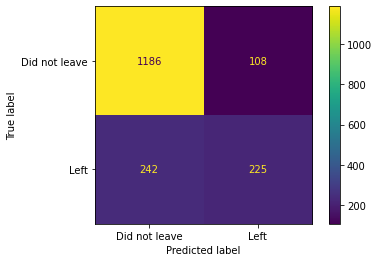

In [236]:
plot_confusion_matrix(clf_xgb,X_test,y_test,values_format='d',display_labels=["Did not leave","Left"])

In [237]:
clf_xgb = xgb.XGBClassifier(seed=42, objective='binary:logistic', gamma=0.25, learn_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3, subsample=0.9, colsample_bytree=0.5)
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.589973
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.595886
[2]	validation_0-aucpr:0.597877
[3]	validation_0-aucpr:0.605037
[4]	validation_0-aucpr:0.613735
[5]	validation_0-aucpr:0.617706
[6]	validation_0-aucpr:0.616412
[7]	validation_0-aucpr:0.638896
[8]	validation_0-aucpr:0.640623
[9]	validation_0-aucpr:0.640144
[10]	validation_0-aucpr:0.641404
[11]	validation_0-aucpr:0.640898
[12]	validation_0-aucpr:0.64293
[13]	validation_0-aucpr:0.637771
[14]	validation_0-aucpr:0.636886
[15]	validation_0-aucpr:0.641885
[16]	validation_0-aucpr:0.64258
[17]	validation_0-aucpr:0.641324
[18]	validation_0-aucpr:0.645835
[19]	validation_0-aucpr:0.649553
[20]	validation_0-aucpr:0.649481
[21]	validation_0-aucpr:0.64976
[22]	validation_0-aucpr:0.651359
[23]	validation_0-aucpr:0.652288
[24]	validation_0-aucpr:0.649909
[25]	validation_0-aucpr:0.649329
[26]	validation_0-aucpr:0.652343
[27]	validation_0-aucpr:0.652407
[28]	validation_0-aucpr

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25,
              learn_rate=0.1, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=3, seed=42,
              silent=None, subsample=0.9, verbosity=1)

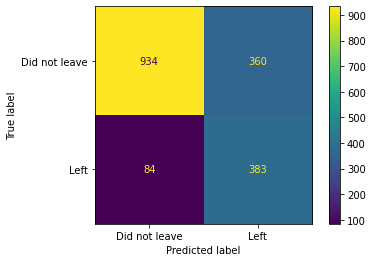

In [238]:
plot_confusion_matrix(clf_xgb,X_test,y_test,values_format='d',display_labels=["Did not leave","Left"])

weight:  {'Contract_Month-to-month': 1, 'MonthlyCharges': 3, 'TechSupport_No': 2, 'TotalCharges': 3, 'Contract_One-year': 1, 'InternetService_Fiber-optic': 1, 'tenure': 2, 'PaymentMethod_Electronic-check': 1}
gain:  {'Contract_Month-to-month': 1631.77637, 'MonthlyCharges': 45.77892063666667, 'TechSupport_No': 39.17785265, 'TotalCharges': 6.002976733333333, 'Contract_One-year': 29.5441971, 'InternetService_Fiber-optic': 291.302612, 'tenure': 117.513321, 'PaymentMethod_Electronic-check': 22.4319458}
cover:  {'Contract_Month-to-month': 1820.25, 'MonthlyCharges': 305.8333333333333, 'TechSupport_No': 331.25, 'TotalCharges': 202.58333333333334, 'Contract_One-year': 173.0, 'InternetService_Fiber-optic': 1210.75, 'tenure': 605.375, 'PaymentMethod_Electronic-check': 337.25}
total_gain:  {'Contract_Month-to-month': 1631.77637, 'MonthlyCharges': 137.33676191, 'TechSupport_No': 78.3557053, 'TotalCharges': 18.008930199999998, 'Contract_One-year': 29.5441971, 'InternetService_Fiber-optic': 291.30261

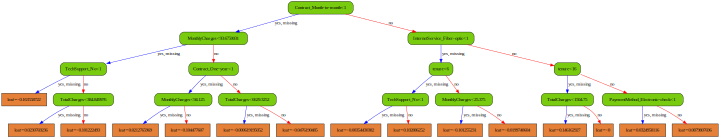

In [244]:
clf_xgb = xgb.XGBClassifier(seed=42, objective='binary:logistic', gamma=0.25, learn_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3, subsample=0.9, colsample_bytree=0.5, n_estimators=1)
clf_xgb.fit(X_train, y_train)

bst = clf_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box', 'style': ' filled, rounded', 'fillcolor': '#78cbe'}
leaf_params = {'shape': 'box', 'style': 'filled', 'fillcolor': '#e48038'}

xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10", condition_node_params=node_params, leaf_node_params=leaf_params)